## Regressão Linear

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import array
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from math import sqrt

In [2]:
dataset = pd.read_csv('high_diamond_ranked_10min.csv').drop(columns=['gameId'])

In [3]:
X = dataset.values[:, 1:]
Y = dataset.values[:,0]
xTreino, xTeste, yTreino, yTeste = train_test_split(X, Y, test_size = 0.20)

In [4]:
Y

array([0., 0., 0., ..., 0., 0., 1.])

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

# Regressão Linear

In [6]:
def normalizar(X, Y):

    Xmedia = np.mean(X, axis=0)
    Ymedia = np.mean(Y, axis=0)
    XdesvioPadrao = np.std(X, axis = 0)
    YdesvioPadrao = np.std(Y, axis = 0)
    X = (X - Xmedia)/XdesvioPadrao
    Y = (Y - Ymedia)/YdesvioPadrao
    
    return X, Y

In [7]:
normalizar(xTreino,yTreino)

(array([[-0.40406509, -0.375095  , -1.00494707, ...,  0.19512822,
         -0.75701336, -0.32606401],
        [ 0.6096357 ,  0.53674006,  0.99507728, ..., -0.28307823,
         -0.61963321,  0.16362407],
        [-0.62933194, -0.83101252,  0.99507728, ...,  0.48621041,
          0.34202785, -0.45249986],
        ...,
        [-0.51669852,  0.08082253,  0.99507728, ...,  1.61051537,
          1.3036889 ,  1.5223078 ],
        [-0.40406509, -0.375095  ,  0.99507728, ...,  0.34014953,
          1.0289286 , -0.12202731],
        [-0.4603818 ,  0.08082253, -1.00494707, ...,  0.42591482,
          0.52520138,  1.10620673]]),
 array([-0.99457375,  1.00545585, -0.99457375, ..., -0.99457375,
         1.00545585, -0.99457375]))

In [8]:
def sigmoide(z):
    return 1 / (1 + np.exp(-z))

In [9]:
def gradienteDescendenteEstocastico(X, Y, epocas, alfa):
    X = np.insert(X, 0, 1, axis =1)
    W = np.ones((X.shape[1],), dtype=float)
    y_predicted = X.dot(W)
    data =np.append(X, np.split(Y, X.shape[0], axis=0), axis=1)
    erro = []

    for epoca in range(epocas):
        somatorio = 0
        for i in range(X.shape[0]):
            W  = W + alfa * (Y[i] - sigmoide(y_predicted[i])) * X[i]
            somatorio += (Y[i] - sigmoide(y_predicted[i])) * X[i]
        
        erro.append((-1/X.shape[0]) * somatorio)        
        data = np.random.permutation(data)
        X = data[: ,0:X.shape[1]]
        Y = data[:,X.shape[1]]
        
        y_predicted = X.dot(W)  
    
    return W, erro

In [10]:
def predicaoRegrecaoLogisticaBinaria(X, W):
    
    predictions = []
    X = np.insert(X, 0, 1, axis =1)
    for i in range(X.shape[0]):
        predictions.append(round(sigmoide(X[i].dot(W))))
        
    return predictions

In [11]:
def predicaoRegrecaoLogistica(X, W):
    
    predictions = []
    X = np.insert(X, 0, 1, axis =1)
    for i in range(X.shape[0]):
        predictions.append(sigmoide(X[i].dot(W)))
        
    return predictions

In [12]:
xTreinoNormalizado, yTreinoNormalizado = normalizar(xTreino, yTreino)
xTesteNormalizado, yTesteNormalizado = normalizar(xTeste, yTeste)

In [13]:
W, erro = gradienteDescendenteEstocastico(xTreinoNormalizado, yTreinoNormalizado, 100, 0.001)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [14]:
predicoesBinarias = predicaoRegrecaoLogisticaBinaria(xTeste, W)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [15]:
def acuracia(x,y):
  acerto = 0
  erro = 0
  contLinhasAcerto = 0
  for i in range(len(x)):
    if(y[i] == 1):
      contLinhasAcerto = contLinhasAcerto + 1
    if(x[i] == y[i]):
      acerto = acerto + 1
    else:
      erro = erro + 1
  acuracia = acerto/len(x)
  print("acertos : "+str(acerto)+", erros: "+str(erro)+", acuracia : "+str(acuracia)+", linhasAcerto1 : "+str(contLinhasAcerto))

In [16]:
acuracia(predicoesBinarias,yTeste)

acertos : 1417, erros: 559, acuracia : 0.7171052631578947, linhasAcerto1 : 1000


In [17]:
f1_score(yTeste, predicoesBinarias)

0.7093083723348933

In [18]:
print(classification_report(yTeste, predicoesBinarias))

              precision    recall  f1-score   support

         0.0       0.70      0.75      0.72       976
         1.0       0.74      0.68      0.71      1000

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



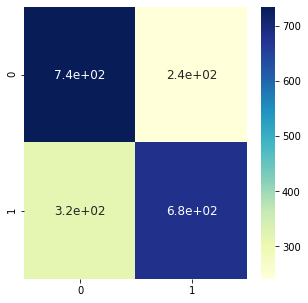

In [19]:
matrizDeConfusao = confusion_matrix(yTeste, predicoesBinarias)
matrizDeConfusaoDF = pd.DataFrame(matrizDeConfusao, index = np.unique(yTeste), columns = np.unique(yTeste))

plt.figure(figsize=(5,5))
sb.heatmap(matrizDeConfusao, annot=True, annot_kws={"size": 12}, cmap="YlGnBu")

In [20]:
matrizDeConfusaoDF

,0.0,1.0
0.0,735,241
1.0,318,682


# KNN

In [21]:
def distanciaEuclidiana(linhaTeste, linhaTreino):
    distancia = 0.0
    for i in range(len(linhaTeste)):
        distancia += (linhaTeste[i] - linhaTreino[i])**2
    return sqrt(distancia)

In [22]:
def getVizinho(treino, ytreino, linhaTeste, numeroDeVizinhos):
    distancias = list()
    for i in range(treino.shape[0]):
        distancia = distanciaEuclidiana(linhaTeste, treino[i])
        distancias.append((treino[i], distancia, ytreino[i]))
    distancias.sort(key=lambda tup: tup[1])
    vizinhos = list()
    for i in range(numeroDeVizinhos):
        vizinhos.append((distancias[i][0], distancias[i][2]))
    return vizinhos

In [23]:
def predicao(treino, teste, numeroDeVizinhos):
    predito = list()
    for i in range(teste.shape[0]):
        neighbors = get_neighbors(treino, teste.iloc[i], numeroDeVizinhos)
        output_values = [row[-1] for row in neighbors]
        predito.append(max(set(output_values), key=output_values.count))
    return predito

In [24]:
def knn(xTreino, yTreino, xTeste, numeroDeVizinhos):
    predito = list()
    for i in range(len(xTeste)):
        vizinhos = getVizinho(xTreino, yTreino, xTeste[i], numeroDeVizinhos)
        saida = [row[-1] for row in vizinhos]
        predito.append(max(set(saida), key=saida.count))
    return predito

In [25]:
predicaoKNN = knn(xTreino,yTreino,xTeste,2)

In [26]:
acuracia(predicaoKNN,yTeste)

acertos : 1270, erros: 706, acuracia : 0.6427125506072875, linhasAcerto1 : 1000


In [27]:
f1_score(yTeste, predicaoKNN)

0.5679314565483476

In [28]:
print(classification_report(yTeste, predicaoKNN))

              precision    recall  f1-score   support

         0.0       0.60      0.83      0.70       976
         1.0       0.73      0.46      0.57      1000

    accuracy                           0.64      1976
   macro avg       0.67      0.64      0.63      1976
weighted avg       0.67      0.64      0.63      1976



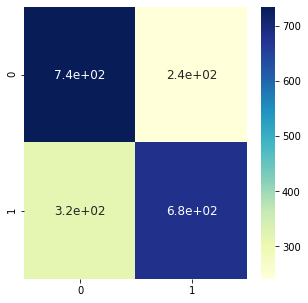

In [29]:
matrizDeConfusao = confusion_matrix(yTeste, predicoesBinarias)
matrizDeConfusaoDF = pd.DataFrame(matrizDeConfusao, index = np.unique(yTeste), columns = np.unique(yTeste))

plt.figure(figsize=(5,5))
sb.heatmap(matrizDeConfusao, annot=True, annot_kws={"size": 12}, cmap="YlGnBu")

In [30]:
matrizDeConfusaoDF

,0.0,1.0
0.0,735,241
1.0,318,682


# ÁRVORE DE DECISÃO

In [31]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score

In [32]:
decisiontree = tree.DecisionTreeClassifier()

criterion = ['gini', 'entropy']
max_depth = [6,7,8,9,10]

parameters = dict(decisiontree__criterion=criterion,
                  decisiontree__max_depth=max_depth)

param_grid = [{'criterion': ['gini'], 'max_depth': [6,7,8,9,10]},
              {'criterion': ['entropy'], 'max_depth':[6,7,8,9,10]}]

In [33]:
clf = GridSearchCV(decisiontree, param_grid)

# Fit the grid search
clf.fit(xTreino, yTreino)

# View The Best Parameters
print('Best Criterion:', clf.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['max_depth'])

Best Criterion: gini
Best max_depth: 6


In [34]:
decisiontree_ = tree.DecisionTreeClassifier(criterion='entropy',max_depth=6)
melhorArvore = decisiontree_.fit(xTreino,yTreino)

In [35]:
melhorArvore.score(xTeste,yTeste)

0.7120445344129555

In [36]:
predicaoArvore = melhorArvore.predict(xTeste)

In [37]:
print(classification_report(yTeste, predicaoArvore))

              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71       976
         1.0       0.72      0.71      0.71      1000

    accuracy                           0.71      1976
   macro avg       0.71      0.71      0.71      1976
weighted avg       0.71      0.71      0.71      1976



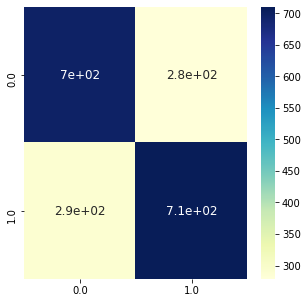

In [40]:
matrizDeConfusao = confusion_matrix(yTeste, predicaoArvore)
matrizDeConfusaoDF = pd.DataFrame(matrizDeConfusao, index = np.unique(yTeste), columns = np.unique(yTeste))

plt.figure(figsize=(5,5))
sb.heatmap(matrizDeConfusaoDF, annot=True, annot_kws={"size": 12}, cmap="YlGnBu")

In [41]:
matrizDeConfusao

array([[697, 279],
       [290, 710]], dtype=int64)

# SVM

In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(xTreino, yTreino)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = yTeste, clf.predict(xTeste)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being